# LEVEL 3

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv("C:\\Users\\Hp\\COGNIFYZ\\Dataset .csv", na_values=[0])
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100.0,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200.0,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591.0


In [3]:
del df['Locality Verbose']

del df['Restaurant ID']

del df['Switch to order menu']

In [4]:
mean_values = df.groupby('City')[['Latitude', 'Longitude']].transform('median')

df[['Latitude', 'Longitude']] = df[['Latitude', 'Longitude']].fillna(mean_values)

df.Cuisines = (df.Cuisines.fillna('Unknown'))

df['Average Cost for two'] = df.groupby('Currency')['Average Cost for two'].transform('median')

df['Aggregate rating'] = df['Aggregate rating'].fillna(1)

df.Votes = df.groupby(['Country Code','Rating color','Rating text'])['Votes'].transform('median')

In [5]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [6]:
int64_columns = df.select_dtypes(include=['int64']).columns

# Convert int64 columns to int32
df[int64_columns] = df[int64_columns].astype('int32')

df['Aggregate rating'] = df['Aggregate rating'].astype('float32')

In [7]:
num_cols = ['Longitude', 'Latitude', 'Average Cost for two', 'Aggregate rating', 'Votes']

cat_cols = []
for i in df.columns: 
    if i not in num_cols:
        cat_cols.append(i)
        
print(cat_cols)

['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Price range', 'Rating color', 'Rating text']


In [8]:
less = ['Chinese','Fast Food','Bakery','Cafe','American','South Indian','Mithai','Street Food','Continental','Italian','Pizza',
        'Mughlai', 'Ice Cream','Desserts','Burger','Biryani']

In [9]:
df.Cuisines = df['Cuisines'].apply(lambda x: x.split(',')[0])

In [10]:
def country(n):
    if n == 1:
        return 'India'
    elif n== 216:
        return 'USA'
    else:
        return 'Other'
    
def city(n):
    if n == 'New Delhi':
        return n
    elif n== 'Gurgaon':
        return n
    elif n == 'Noida':
        return n
    else:
        return 'Other'
    
    
def cuisine(n):
    if n == 'North Indian':
        return n
    elif n in less:
        return 'less_demand'
    else:
        return 'least_demand'
    


In [11]:
df['Cuisine Count'] = df['Cuisines'].apply(lambda x: len(x.split(',')))

df['Locality'] = df['Locality'].apply(lambda x: x.split(','))

df['Address'] = df['Address'].apply(lambda x: x.split(','))

df['Country Code'] = df['Country Code'].apply(country)

df['City'] = df['City'].apply(city)

df['Cuisines'] = df['Cuisines'].apply(cuisine)

In [12]:
df.drop(columns=['Restaurant Name','Address','Locality','Currency'], inplace=True)

In [13]:
dummy = ['Has Table booking','Has Online delivery','Is delivering now','Price range','Rating color','Rating text']

df_dummy = pd.get_dummies(df,drop_first=True,dtype = int)

In [14]:
print('original data',df.shape)
print('dummy data',df_dummy.shape)

original data (9551, 15)
dummy data (9551, 27)


In [15]:
df_dummy.head(1)

,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Cuisine Count,Country Code_Other,Country Code_USA,City_New Delhi,City_Noida,City_Other,Cuisines_least_demand,Cuisines_less_demand,Has Table booking_Yes,Has Online delivery_Yes,Is delivering now_Yes,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_White,Rating color_Yellow,Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
0,121.027535,14.565443,1150.0,3,4.8,448.5,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0


## TASK 3

### Predictive Modeling

Build a regression model to predict the aggregate rating of a restaurant based on available features.

In [16]:
x = df_dummy.drop(columns = 'Aggregate rating')
y = df_dummy['Aggregate rating']

In [17]:
# Train test split
from sklearn.model_selection import train_test_split

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=56)

In [19]:
from sklearn.linear_model import LinearRegression
# using this as base model because it is good for inferences as it is simple model.

In [20]:
import statsmodels.api as sma

In [21]:
base_model = sma.OLS(y,sma.add_constant(x)).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Aggregate rating   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 1.894e+04
Date:                Thu, 26 Sep 2024   Prob (F-statistic):               0.00
Time:                        02:05:11   Log-Likelihood:                 2995.6
No. Observations:                9551   AIC:                            -5949.
Df Residuals:                    9530   BIC:                            -5799.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Longitude                  -0.0001      0.000     -0.856      0.392      -0.000       0.000
Latitude                   -0.0003      0.000     -1.118      0.263      -0.001       0.000
Average Cost for two     2.024e-07   2.25e-07      0.898      0.369   -2.39e-07    6.44e-07
Price range                 0.0172      0.003      6.029      0.000       0.012       0.023
Votes                    3.804e-05   4.44e-05      0.857      0.391    -4.9e-05       0.000
Cuisine Count               2.6079      0.014    179.948      0.000       2.580       2.636
Country Code_Other          0.0007      0.013      0.053      0.958      -0.025       0.026
Country Code_USA           -0.0046      0.025     -0.182      0.855      -0.054       0.045
City_New Delhi             -0.0018      0.006     -0.312      0.755      -0.013       0.010
City_Noida                 -0.0298      0.008     -3.911      0.000      -0.045      -0.015
City_Other                  0.0376      0.008      4.538      0.000       0.021       0.054
Cuisines_least_demand       0.0355      0.007      5.420      0.000       0.023       0.048
Cuisines_less_demand        0.0260      0.004      6.213      0.000       0.018       0.034
Has Table booking_Yes       0.0092      0.007      1.340      0.180      -0.004       0.023
Has Online delivery_Yes    -0.0009      0.005     -0.204      0.838      -0.010       0.008
Is delivering now_Yes      -0.0258      0.031     -0.841      0.400      -0.086       0.034
Rating color_Green          0.7339      0.004    177.219      0.000       0.726       0.742
Rating color_Orange         0.4161      0.008     50.624      0.000       0.400       0.432
Rating color_Red           -0.1695      0.007    -25.240      0.000      -0.183      -0.156
Rating color_White         -0.8126      0.005   -173.915      0.000      -0.822      -0.803
Rating color_Yellow         0.5100      0.003    166.309      0.000       0.504       0.516
Rating text_Excellent       1.9300      0.019     99.743      0.000       1.892       1.968
Rating text_Good            0.5100      0.003    166.309      0.000       0.504       0.516
Rating text_Not rated      -0.8126      0.005   -173.915      0.000      -0.822      -0.803
Rating text_Poor           -0.1695      0.007    -25.240      0.000      -0.183      -0.156
Rating text_Very Good       0.7339      0.004    177.219      0.000       0.726       0.742
==============================================================================
Omnibus:                      360.239   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              458.540
Skew:                          -0.415   Prob(JB):                    2.69e-100
Kurtosis:                       3.680   Cond. No.                     1.01e+16
====================

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_list = []

for i in range(x.shape[1]):
    vif_list.append(variance_inflation_factor(x.values,i))
    
pd.DataFrame({'Feature':x.columns, 'VIF': vif_list}).\
sort_values(by='VIF', ascending=False)

,Feature,VIF
25,Rating text_Very Good,inf
16,Rating color_Green,inf
24,Rating text_Poor,inf
23,Rating text_Not rated,inf
22,Rating text_Good,inf
21,Rating text_Excellent,inf
20,Rating color_Yellow,inf
19,Rating color_White,inf
18,Rating color_Red,inf
17,Rating color_Orange,inf


#### Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.

There is high multicollinearity in dataset(using cond.No.). We can drop the columns with inf as vif value as they are producing high multicollinearity.

High value of r2 shows that most of the variation in target column is explained. r2 = 0.975

Durbin watson is 1.883 : some autocorrelation is present between rows

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

ypred = base_model.predict(xtest)

# Evaluate the model
mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ypred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.1285330768268045
Mean Squared Error (MSE): 0.03050390664076864
Root Mean Squared Error (RMSE): 0.17465367628758532
R-squared (R²): 0.9758194847549747


In [24]:
# Error should be minimum 
# and  value of r2 to be max 
# is the proof of good model

Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.

In [25]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [26]:
models = []
mse_list = []
mae_list = []
rmse_list = []
r2_list = []

def model_validationn(model, xtrain, ytrain, xtest, ytest):
    m = model
    m.fit(xtrain, ytrain)
    pred = m.predict(xtest)
    
    mae = mean_absolute_error(ytest, pred)
    mse = mean_squared_error(ytest, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(ytest, pred)
    
    print(f"Model: {m}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")
    
    resp = input('Do you want to add the model to the summary? Y/N: ')
    if resp.lower() == 'y':
        models.append(str(m))
        mae_list.append(mae)
        mse_list.append(mse)
        rmse_list.append(rmse)
        r2_list.append(r2)
        
        global model_df
        model_df = pd.DataFrame({
            'model': models,
            'MAE': mae_list,
            'MSE': mse_list,
            'RMSE': rmse_list,
            'R²': r2_list
        })
    else:
        return

In [27]:
modd=[LinearRegression(),DecisionTreeRegressor(),
     AdaBoostRegressor(),GradientBoostingRegressor(),RandomForestRegressor(),XGBRegressor()]

In [28]:
for i in modd:
    model_validationn(i,xtrain,ytrain,xtest,ytest)

Model: LinearRegression()
Mean Absolute Error (MAE): 0.12936153525197122
Mean Squared Error (MSE): 0.030663668654170122
Root Mean Squared Error (RMSE): 0.17511044701607648
R-squared (R²): 0.9756928410484448
Do you want to add the model to the summary? Y/N: y
Model: DecisionTreeRegressor()
Mean Absolute Error (MAE): 0.16128055050251622
Mean Squared Error (MSE): 0.06047245296323749
Root Mean Squared Error (RMSE): 0.24591147383405576
R-squared (R²): 0.9520633508356164
Do you want to add the model to the summary? Y/N: y
Model: AdaBoostRegressor()
Mean Absolute Error (MAE): 0.14078341257051863
Mean Squared Error (MSE): 0.03821328605804204
Root Mean Squared Error (RMSE): 0.19548218859538596
R-squared (R²): 0.969708242391024
Do you want to add the model to the summary? Y/N: y
Model: GradientBoostingRegressor()
Mean Absolute Error (MAE): 0.12594673053299757
Mean Squared Error (MSE): 0.030343719732451594
Root Mean Squared Error (RMSE): 0.17419448823786474
R-squared (R²): 0.9759464652766577
Do y

In [29]:
model_df

,model,MAE,MSE,RMSE,R²
0,LinearRegression(),0.129362,0.030664,0.175110,0.975693
1,DecisionTreeRegressor(),0.161281,0.060472,0.245911,0.952063
2,AdaBoostRegressor(),0.140783,0.038213,0.195482,0.969708
3,GradientBoostingRegressor(),0.125947,0.030344,0.174194,0.975946
4,RandomForestRegressor(),0.127442,0.033485,0.182989,0.973456
5,"XGBRegressor(base_score=None, booster=None, ca...",0.129113,0.032288,0.179689,0.974405


In [30]:
# for gradient we are getting all the metric correctly as errors are minimum and r2 is maximum

# so this will be our final model and we can also perform hyperparameter tuning to get even better results

In [31]:
final_model=XGBRegressor().fit(xtrain,ytrain)

In [ ]:
#  Save the model to a pickle file
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

## TASK 2

### Customer Preference Analysis

Analyze the relationship between the type of cuisine and the restaurant's rating.



In [31]:
df1 = pd.read_csv("C:\\Users\\Hp\\COGNIFYZ\\Dataset .csv", na_values=[0])
df1.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100.0,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200.0,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591.0


In [32]:
del df1['Locality Verbose']

del df1['Restaurant ID']

del df1['Switch to order menu']

In [33]:
mean_values = df1.groupby('City')[['Latitude', 'Longitude']].transform('median')

df1[['Latitude', 'Longitude']] = df1[['Latitude', 'Longitude']].fillna(mean_values)

df1.Cuisines = (df1.Cuisines.fillna('Unknown'))

df1['Average Cost for two'] = df1.groupby('Currency')['Average Cost for two'].transform('median')

df1['Aggregate rating'] = df1['Aggregate rating'].fillna(1)

df1.Votes = df1.groupby(['Country Code','Rating color','Rating text'])['Votes'].transform('median')

In [34]:
int64_columns = df1.select_dtypes(include=['int64']).columns

# Convert int64 columns to int32
df1[int64_columns] = df1[int64_columns].astype('int32')

df1['Aggregate rating'] = df1['Aggregate rating'].astype('float32')

In [35]:
df1['Cuisines'] = df1['Cuisines'].str.split(', ')
df1_exploded = df1.explode('Cuisines')

average_ratings = df1_exploded.groupby('Cuisines')['Aggregate rating'].mean().reset_index().sort_values(by='Aggregate rating', ascending=False)
print("Average Ratings by Cuisine:")
print(average_ratings)

Average Ratings by Cuisine:
           Cuisines  Aggregate rating
130           Sunda          4.900000
26           B�_rek          4.700000
132       Taiwanese          4.650000
112           Ramen          4.500000
43          Dim Sum          4.466667
..              ...               ...
11           Awadhi          2.118182
94         Moroccan          2.020000
6          Armenian          1.966667
90          Mineira          1.000000
39   Cuisine Varies          1.000000

[146 rows x 2 columns]


In [36]:
# Sunda is having maximum aggregate rating while 'cuisine varies' has minimum rating

Identify the most popular cuisines among customers based on the number of votes.


In [37]:
total_votes = df1_exploded.groupby('Cuisines')['Votes'].sum().reset_index().sort_values(by='Votes', ascending=False)
print("\nTotal Votes by Cuisine:")
print(total_votes)


Total Votes by Cuisine:
              Cuisines     Votes
100       North Indian  233757.5
34             Chinese  166008.0
70             Italian  120544.0
37         Continental  104842.5
49           Fast Food  103247.0
..                 ...       ...
29            Canadian      16.0
57   Gourmet Fast Food      13.5
107           Peruvian       9.0
39      Cuisine Varies       2.0
90             Mineira       2.0

[146 rows x 2 columns]


In [38]:
# North Indian is having maximum votes, means it is most demanded and liked
# while mineira and Cuisine Varies is having minimum votes

Determine if there are any specific cuisines that tend to receive higher ratings.

In [39]:
cuisine_analysis = df1_exploded.groupby('Cuisines').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum'
}).reset_index().sort_values(by='Aggregate rating', ascending=False)

print("\nCuisine Analysis (Average Rating and Total Votes):")
print(cuisine_analysis)



Cuisine Analysis (Average Rating and Total Votes):
           Cuisines  Aggregate rating   Votes
130           Sunda          4.900000  4428.0
26           B�_rek          4.700000   376.5
132       Taiwanese          4.650000   456.0
112           Ramen          4.500000   715.5
43          Dim Sum          4.466667   659.0
..              ...               ...     ...
11           Awadhi          2.118182   456.5
94         Moroccan          2.020000   240.0
6          Armenian          1.966667   124.0
90          Mineira          1.000000     2.0
39   Cuisine Varies          1.000000     2.0

[146 rows x 3 columns]


In [40]:
# visualizing sunda we can see that where aggregate rating is max it is not necessary to have maximum votes

## TASK 3

### Data Visualization

Create visualizations to represent the distribution of ratings using different charts (histogram, barplot, etc.).

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

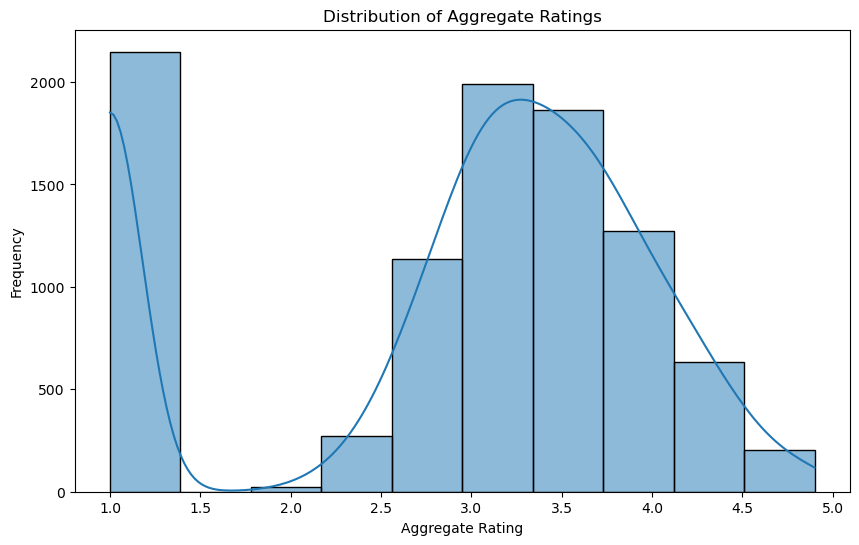

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Aggregate rating'], bins=10, kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

# most of the ratings are between 2.6 to 4.5
# there are high number of restaurants with rating less than 1.5

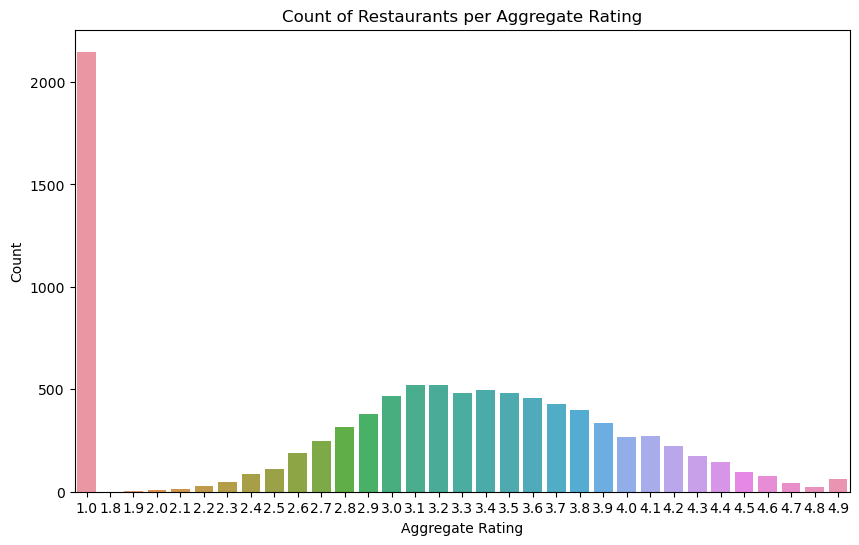

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Aggregate rating', data=df1)
plt.title('Count of Restaurants per Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()

Compare the average ratings of different cuisines or cities using appropriate visualizations.

In [44]:
# average rating for each cuisine
average_ratings_cuisines = df1_exploded.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# average rating for each city
average_ratings_cities = df1_exploded.groupby('City')['Aggregate rating'].mean().reset_index()


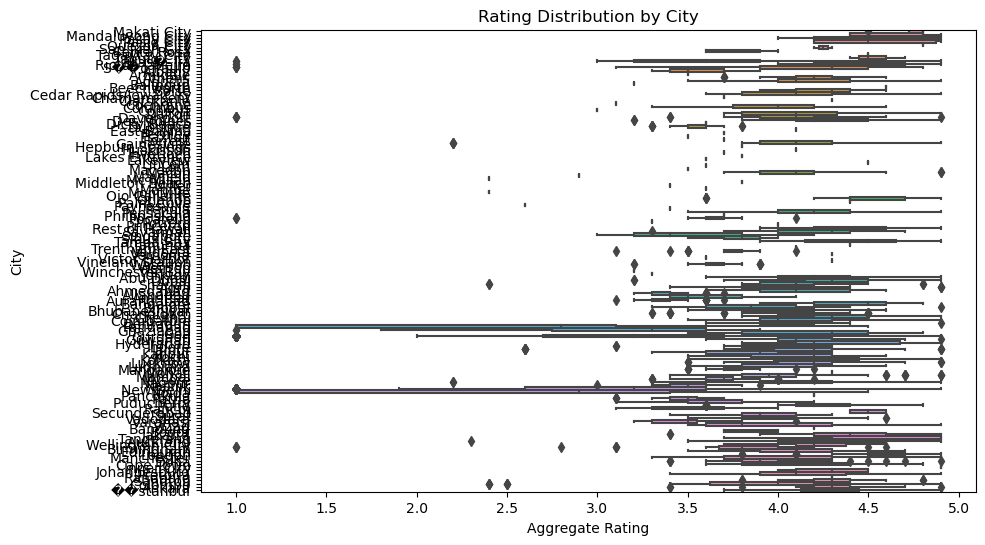

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Aggregate rating', y='City', data=df1_exploded)
plt.title('Rating Distribution by City')
plt.xlabel('Aggregate Rating')
plt.ylabel('City')
plt.show()

# no output we can get from this plot

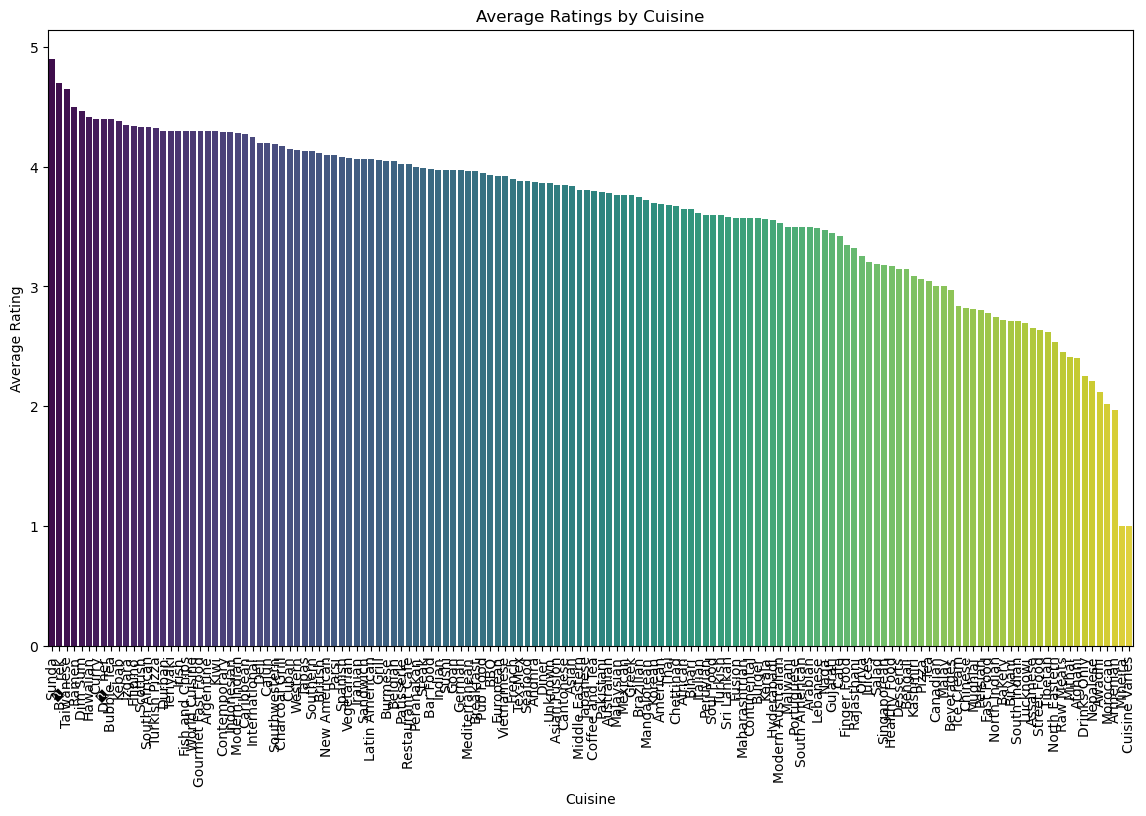

In [46]:
average_ratings_cuisines = df1_exploded.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort by average rating
average_ratings_cuisines_sorted = average_ratings_cuisines.sort_values(by='Aggregate rating', ascending=False)


plt.figure(figsize=(14, 8))
sns.barplot(x='Cuisines', y='Aggregate rating', data=average_ratings_cuisines_sorted, palette='viridis')
plt.title('Average Ratings by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

In [47]:
# aggregate rating of 'sunda' is maximum 

Visualize the relationship between various features and the target variable to gain insights.

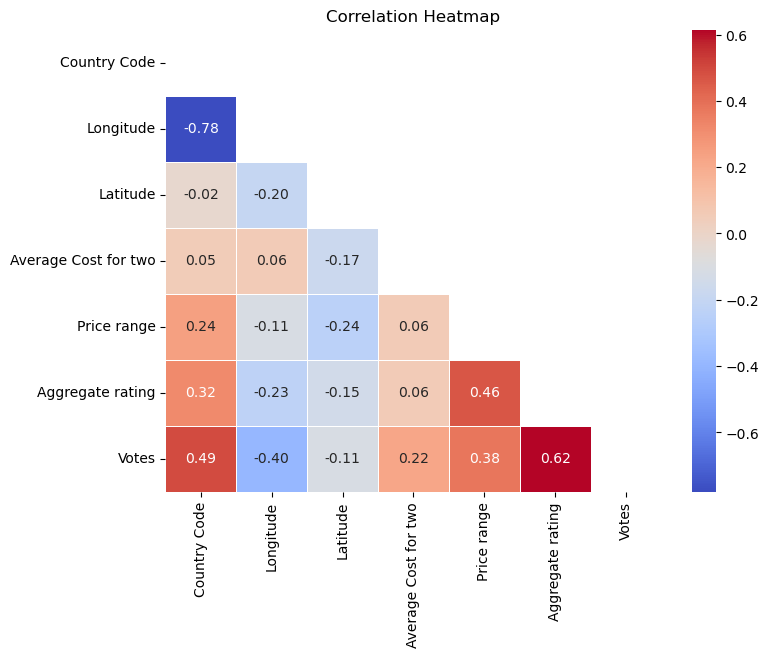

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, 
            mask=np.triu(df1.corr(numeric_only=True)))
plt.title('Correlation Heatmap')
plt.show()

In [49]:
# target variable is highly correlated with votes, price range
# upta a limit to country code

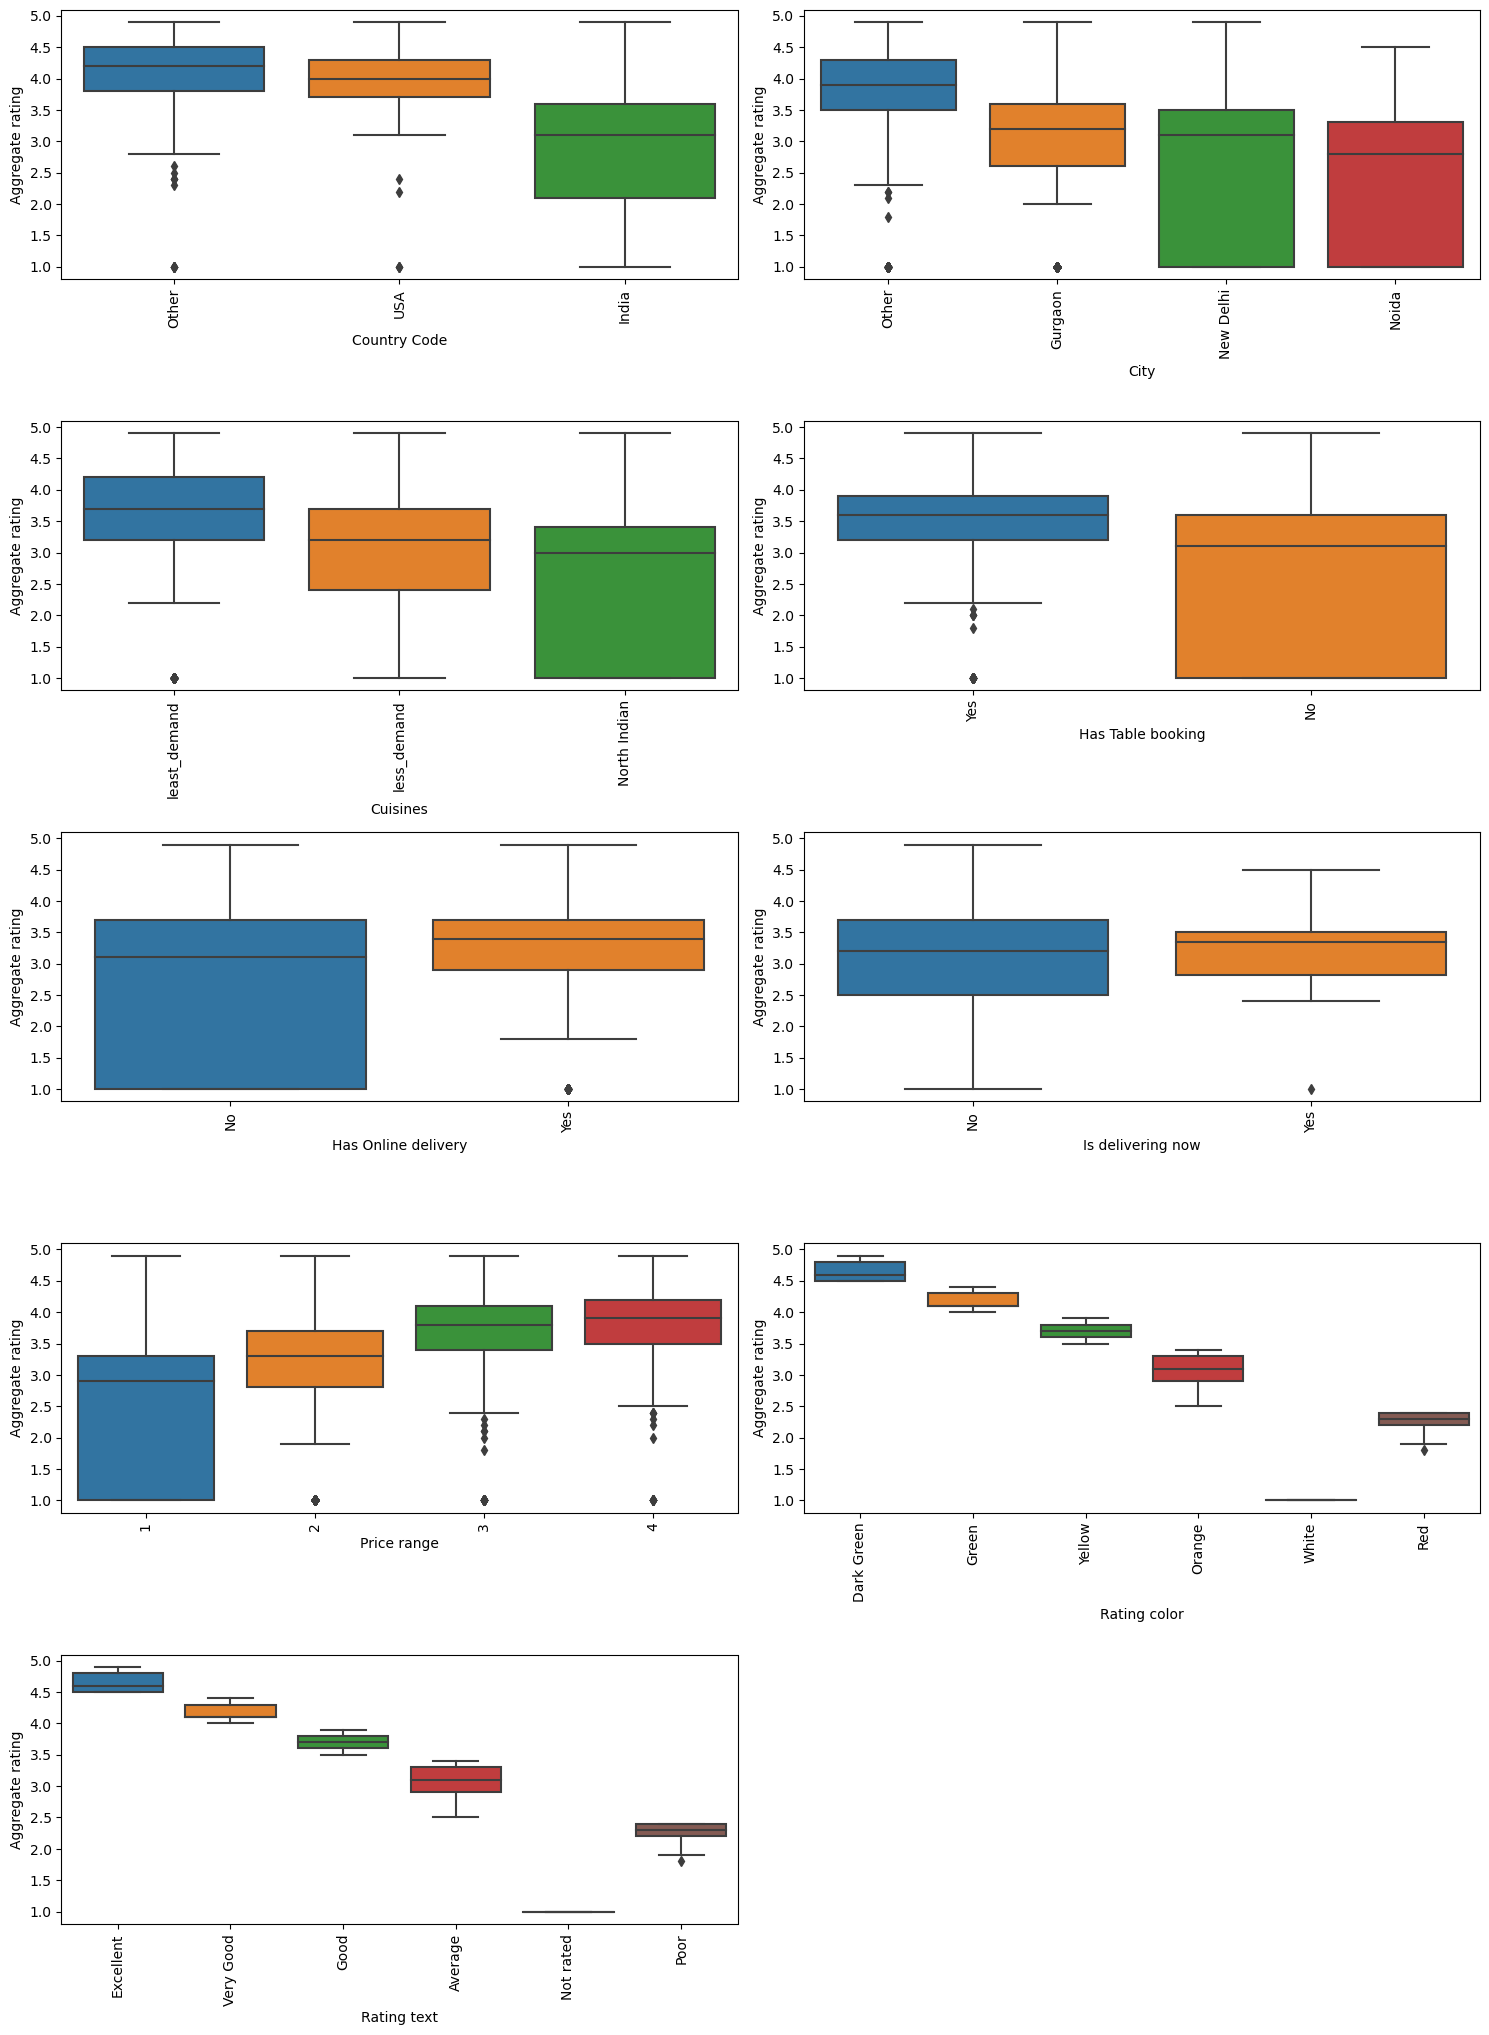

In [50]:
# with modified data
plt.figure(figsize=(15,40))
nrows=10
ncols=2
iterator=1

for i in cat_cols:
    if i in df.columns:
        plt.subplot(nrows,ncols,iterator)
        sns.boxplot(data = df, x=i,y='Aggregate rating')
        iterator+=1
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [51]:
# In India , has table booking = 'No', has online booking = 'No', is delivering now = 'No' , with price range = 1
# aggregate rating is negatively skewed
# where rating color is white and rating text is not rated aggregate rating is 1

In [52]:
num_cols = ['Longitude', 'Latitude', 'Average Cost for two', 'Votes']

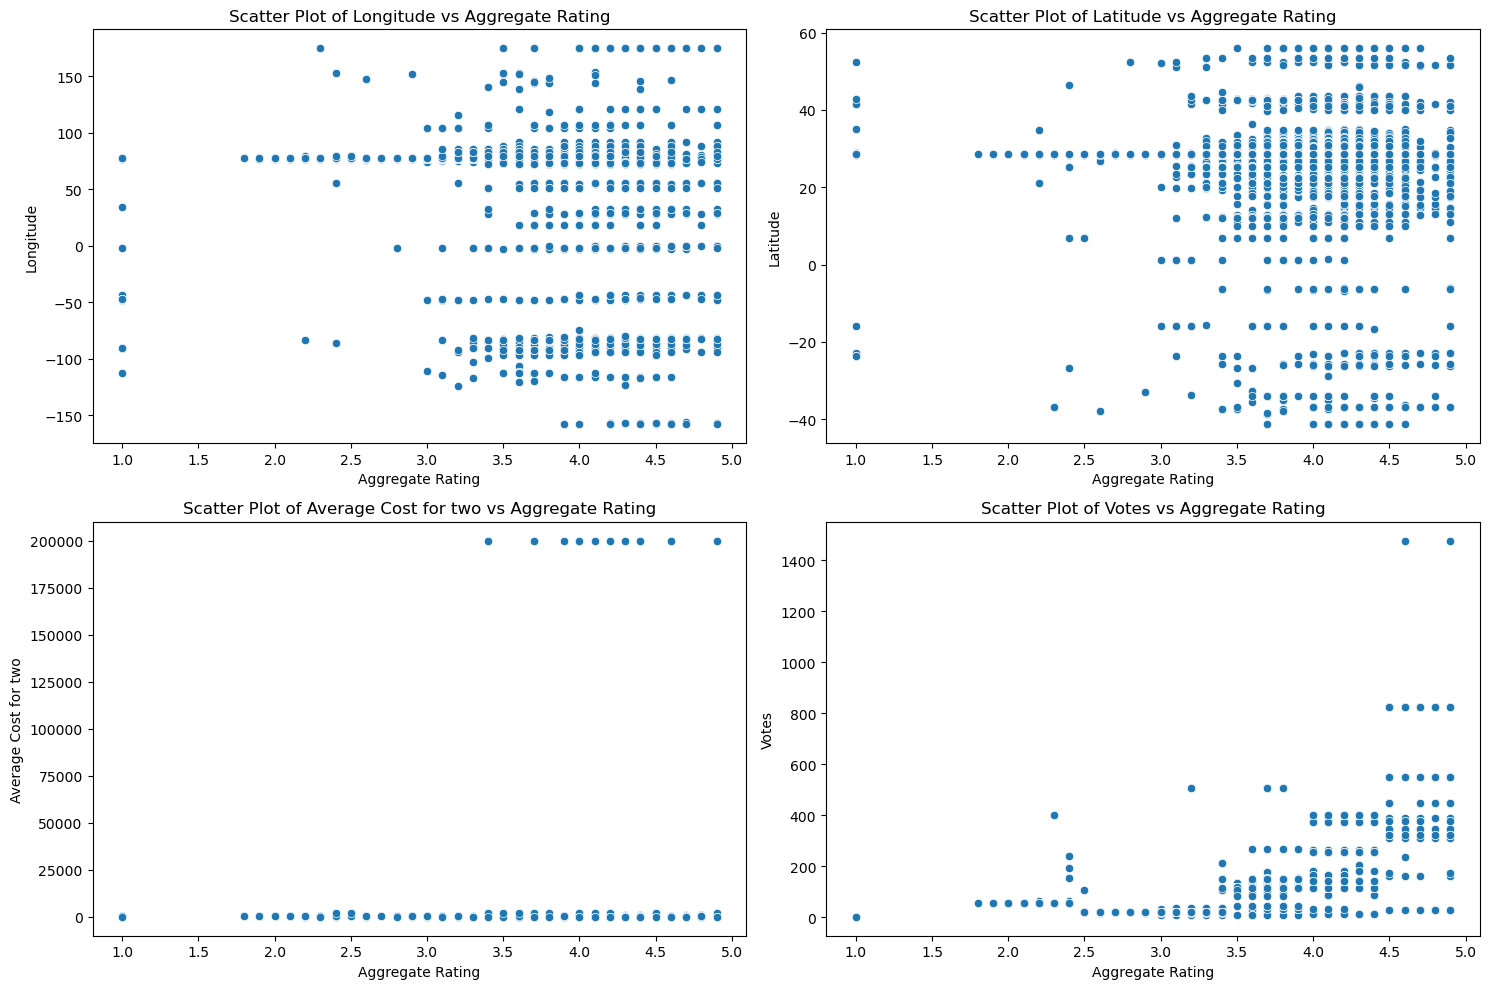

In [53]:
plt.figure(figsize=(15, 10))
nrows = 2
ncols = 2
iterator = 1

for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.scatterplot(data=df1, x='Aggregate rating', y=i)
    plt.title(f'Scatter Plot of {i} vs Aggregate Rating')
    plt.xlabel('Aggregate Rating')
    plt.ylabel(i)
    iterator += 1

plt.tight_layout()
plt.show()


In [54]:
# aggregate rating is independent of latitude and longitude.
# where average cost for two is high aggregate rating is also high
# mostly restaurants with high votes have high aggregate rating.